In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [4]:
root_path = './backbone/data/backtest/experiments'
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'


path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_15-RR_2-CloseByTimeTrue-TS_False'
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [5]:
orders

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,fda0850b-3818-11ef-92c0-958c92a01fe8,USDJPY,OperationType.BUY,2024-01-02 04:00:00,2024-01-02 07:00:00,141.5590,141.5590,141.4090,-10.0500,141.4090,141.8590,67,-0.1500,ClosePositionType.STOP_LOSS
1,fe8ce3c1-3818-11ef-8430-958c92a01fe8,GBPUSD,OperationType.BUY,2024-01-03 13:00:00,2024-01-03 21:00:00,1.2627,1.2627,1.2664,24.6180,1.2612,1.2657,6600,0.0037,ClosePositionType.DAYS
2,fee98582-3818-11ef-9d04-958c92a01fe8,EURUSD,OperationType.BUY,2024-01-04 04:00:00,2024-01-04 10:00:00,1.0919,1.0919,1.0949,20.0214,1.0904,1.0949,6764,0.0030,ClosePositionType.TAKE_PROFIT
3,ff653190-3818-11ef-86c2-958c92a01fe8,USDCAD,OperationType.BUY,2024-01-04 17:00:00,2024-01-05 00:00:00,1.3354,1.3354,1.3339,-10.0696,1.3339,1.3384,6897,-0.0015,ClosePositionType.STOP_LOSS
4,013ff2a9-3819-11ef-a254-958c92a01fe8,EURUSD,OperationType.SELL,2024-01-09 06:00:00,2024-01-09 14:00:00,1.0956,1.0956,1.0940,10.5865,1.0971,1.0926,6830,0.0015,ClosePositionType.DAYS
5,018a2e5d-3819-11ef-a853-958c92a01fe8,GBPUSD,OperationType.SELL,2024-01-09 09:00:00,2024-01-09 13:00:00,1.2747,1.2747,1.2717,20.5583,1.2762,1.2717,6830,0.0030,ClosePositionType.TAKE_PROFIT
6,019657c8-3819-11ef-9292-958c92a01fe8,USDCAD,OperationType.BUY,2024-01-09 10:00:00,2024-01-09 16:00:00,1.3362,1.3362,1.3392,20.4900,1.3347,1.3392,6830,0.0030,ClosePositionType.TAKE_PROFIT
7,01aab668-3819-11ef-bf5d-958c92a01fe8,USDJPY,OperationType.BUY,2024-01-09 13:00:00,2024-01-09 15:00:00,144.0740,144.0740,143.9240,-10.5000,143.9240,144.3740,70,-0.1500,ClosePositionType.STOP_LOSS
8,020c4052-3819-11ef-b171-958c92a01fe8,AUDUSD,OperationType.BUY,2024-01-10 07:00:00,2024-01-10 15:00:00,0.6704,0.6704,0.6698,-3.9072,0.6689,0.6734,7104,-0.0005,ClosePositionType.DAYS
9,0243720c-3819-11ef-9234-958c92a01fe8,EURUSD,OperationType.BUY,2024-01-10 08:00:00,2024-01-10 12:00:00,1.0924,1.0924,1.0954,21.0278,1.0909,1.0954,7104,0.0030,ClosePositionType.TAKE_PROFIT


In [6]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [7]:
orders.operation_type.value_counts()

operation_type
OperationType.BUY     128
OperationType.SELL     89
Name: count, dtype: int64

# Compras que salieron bien

In [8]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.65625

# Ventas que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.7528089887640449

# Cierres por SL y TP

In [10]:
orders.comment.value_counts()

comment
ClosePositionType.TAKE_PROFIT    85
ClosePositionType.DAYS           82
ClosePositionType.STOP_LOSS      50
Name: count, dtype: int64

In [11]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [12]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [13]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [14]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,AUDUSD,13,3,643.9834,81.2500
3,USDCAD,29,10,1086.0760,74.3590
1,EURUSD,25,10,799.5144,71.4286
4,USDCHF,21,10,722.3084,67.7419
5,USDJPY,42,21,1388.9130,66.6667
2,GBPUSD,21,12,772.8238,63.6364


# Rendimiento por mes

In [15]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2024,1,40,17.0000,13.0000,25.0000,15.0000,0.6250,25.8000,301.8860,1301.8860,0.3020
1,2024,2,43,15.0000,10.0000,31.0000,12.0000,0.7210,61.6200,573.3010,1875.1870,0.4400
2,2024,3,30,16.0000,4.0000,23.0000,7.0000,0.7670,58.0920,792.1760,2667.3630,0.4220
3,2024,4,40,12.0000,9.0000,28.0000,12.0000,0.7000,97.8120,1027.8310,3695.1940,0.3850
4,2024,5,33,17.0000,7.0000,24.0000,9.0000,0.7270,132.7830,1592.2860,5287.4800,0.4310
5,2024,6,31,8.0000,7.0000,20.0000,11.0000,0.6450,127.8490,1126.1380,6413.6190,0.2130


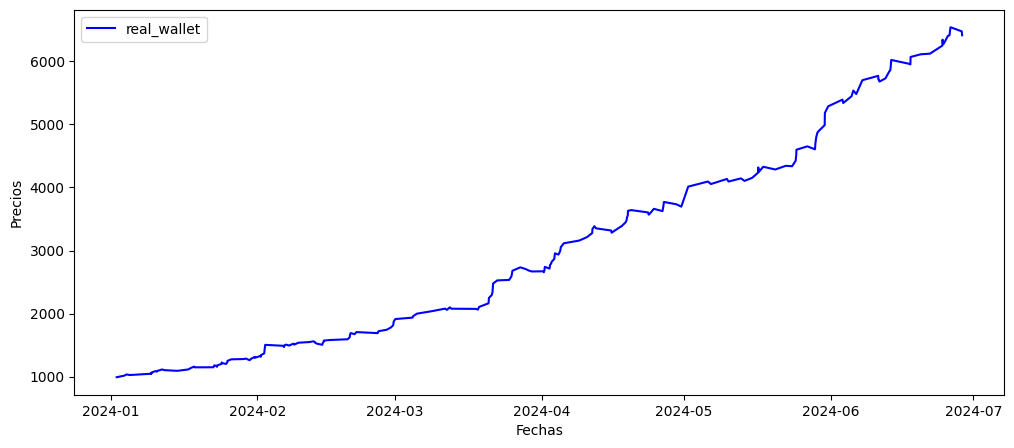

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [17]:
orders_per_month_gb.perc_change.mean()

0.3655

In [18]:
orders_per_month_gb.perc_change.std()

0.09022361110042093

In [19]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.3020,3906.0000
2,0.4400,5624.6400
3,0.4220,7998.2381
4,0.3850,11077.5597
5,0.4310,15851.9880
6,0.2130,19228.4614


# Rendimiento por dia

In [20]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==1]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2024,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-10.0500,-10.0500,989.9500,-0.0100
1,2024,1,1,0.0000,0.0000,1.0000,0.0000,100.0000,24.6180,24.6180,1014.5680,0.0240
2,2024,1,1,1.0000,0.0000,1.0000,0.0000,100.0000,20.0210,20.0210,1034.5890,0.0190
3,2024,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-10.0700,-10.0700,1024.5200,-0.0100
4,2024,1,4,2.0000,1.0000,3.0000,1.0000,75.0000,20.5580,41.1350,1065.6550,0.0390
5,2024,1,4,1.0000,0.0000,2.0000,2.0000,50.0000,21.0280,25.4460,1091.1010,0.0230
6,2024,1,1,1.0000,0.0000,1.0000,0.0000,100.0000,21.9000,21.9000,1113.0010,0.0200
7,2024,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-10.8330,-10.8330,1102.1680,-0.0100
8,2024,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-10.9500,-10.9500,1091.2180,-0.0100
9,2024,1,2,2.0000,0.0000,2.0000,0.0000,100.0000,22.2630,44.1610,1135.3780,0.0390


In [21]:
# ticker = 'EURUSD'
# date_from = datetime(2022,1,1)
# date_to = date_from + timedelta(days=30)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label=f'{ticker} Price', color='blue')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title(f'{ticker} Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [22]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss    profit  tp_cumsum  sl_cumsum  \
year month day                                                           
2024 1     2              0          1  -10.0500          0          1   
           3              0          0   24.6180          0          1   
           4              1          0   20.0214          1          1   
           5              0          1  -10.0696          1          2   
           9              2          1   41.1348          3          3   
           10             1          0   25.4462          4          3   
           11             1          0   21.9000          5          3   
           12             0          1  -10.8332          5          4   
           15             0          1  -10.9500          5          5   
           17             2          0   44.1607          7          5   
           18             1          1   11.3084          8          6   
           22             1          0   31.4209          9          6   
           23             1          2   -0.4617         10          8   
           24             2          1   35.1081         12          9   
           25             2          1   36.1154         14         10   
           26             1          0   24.8115         15         10   
           29             0          0   11.9989         15         10   
           30             1          2   -0.5987         16         12   
           31             1          1   16.8047         17         13   
     2     1              2          1   39.7499          2          1   
           2              6          0  161.7055          8          1   
           6              1          2   -5.1013          9          3   
           7              0          1   -6.0911          9          4   
           8              0          1   15.1210          9          5   
           9              0          0   29.7421          9          5   
           12             0          0   21.9550          9          5   
           13             0          2  -38.8471          9          7   
           14             1          1   31.9214         10          8   
           15             0          0   19.2546         10          8   
           16             0          0    9.3450         10          8   
           20             2          0  109.3977         12          8   
           21             1          1   16.0658         13          9   
           26             0          1   16.5212         13         10   
           27             0          0    5.5123         13         10   
           28             0          0   14.6050         13         10   
           29             2          0  132.4440         15         10   
     3     1              1          0   37.5000          1          0   
           4              0          0   45.8623          1          0   
           5              1          0   39.3000          2          0   
           8              1          0   39.6906          3          0   
           11             1          1   20.1737          4          1   
           12             1          1   19.0622          5          2   
           18             1          0   27.9823          6          2   
           20             2          0  142.9675          8          2   
           21             5          0  228.4119         13          2   
           22             1          0   49.5000         14          2   
           25             1          0  153.5759         15          2   
           27             1          0   53.7000         16          2   
           28             0          1  -27.3000         16          3   
           29             0          1  -38.2499         16          4   
     4     1              1          0   73.1436          1          0   
           2              1          1   52.1112          2          1   
           3        

# Que hubiera pasado si no se operaba con algunos tickers?

In [23]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# print(tickers_permitidos)

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    # 'USDJPY', 
    'USDCAD', 
    'AUDUSD', 
    'USDCHF'
]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [24]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
16,2024,2,3,2.0000,1.0000,2.0000,1.0000,66.6670,26.3840,39.7500,1335.7860,0.0300
17,2024,2,5,5.0000,0.0000,5.0000,0.0000,100.0000,27.0920,135.0060,1470.7910,0.0920
18,2024,2,3,1.0000,2.0000,1.0000,2.0000,33.3330,29.7650,0.2990,1471.0900,0.0000
19,2024,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,8.9090,8.9090,1479.9990,0.0060
20,2024,2,2,0.0000,1.0000,1.0000,1.0000,50.0000,30.4410,15.1210,1495.1200,0.0100
21,2024,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,29.7420,29.7420,1524.8620,0.0200
22,2024,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,10.8370,10.8370,1535.6990,0.0070
23,2024,2,2,0.0000,2.0000,0.0000,2.0000,0.0000,-15.4580,-31.4630,1504.2360,-0.0210
24,2024,2,2,0.0000,1.0000,1.0000,1.0000,50.0000,17.2280,1.6210,1505.8570,0.0010
25,2024,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,19.2550,19.2550,1525.1120,0.0130


In [25]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [26]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,AUDUSD,13,3,643.9834,0.8125
3,USDCAD,29,10,1086.0760,0.7436
1,EURUSD,25,10,799.5144,0.7143
4,USDCHF,21,10,722.3084,0.6774
2,GBPUSD,21,12,772.8238,0.6364


In [27]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

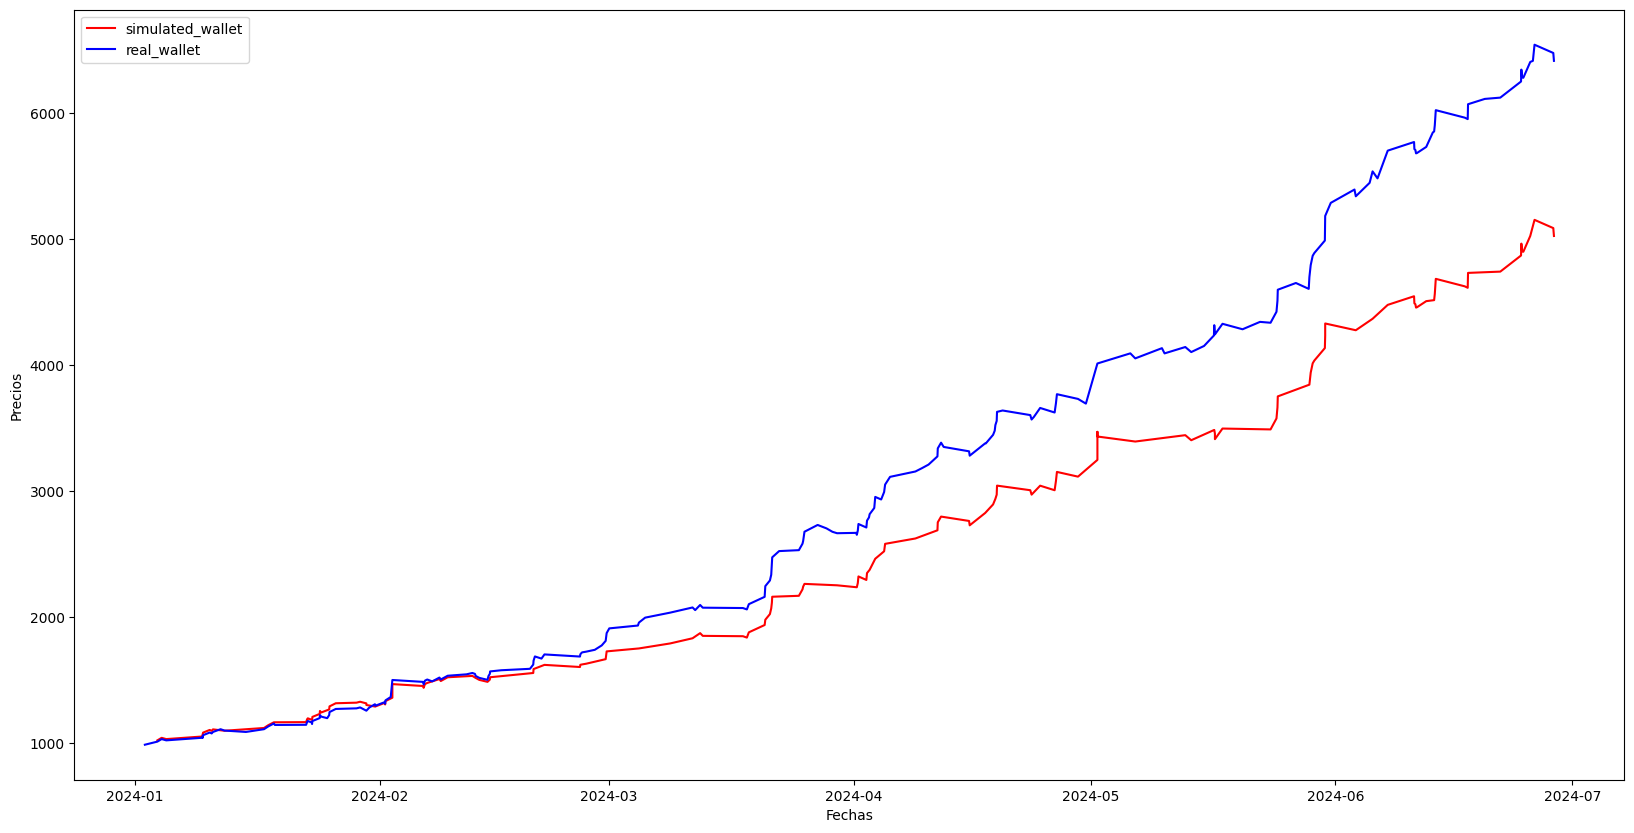

In [28]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [29]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [30]:
true_values

,precision,recall,f1
0,0.7766,0.6856,0.7026
1,0.7783,0.6827,0.6999
2,0.7809,0.6789,0.6963
3,0.7761,0.6863,0.7031
4,0.7785,0.6761,0.6931
5,0.7725,0.6824,0.6990
6,0.7846,0.6886,0.7050
7,0.7734,0.6633,0.6803
8,0.7846,0.6939,0.7095
9,0.7787,0.6754,0.6915


In [31]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.6113198578008834
0.5401869158878505
0.5455791252554335


              precision    recall  f1-score   support

         0.0       0.41      0.68      0.52       192
         1.0       0.72      0.46      0.56       343

    accuracy                           0.54       535
   macro avg       0.57      0.57      0.54       535
weighted avg       0.61      0.54      0.55       535

Confusion Matrix
[[131  61]
 [185 158]]


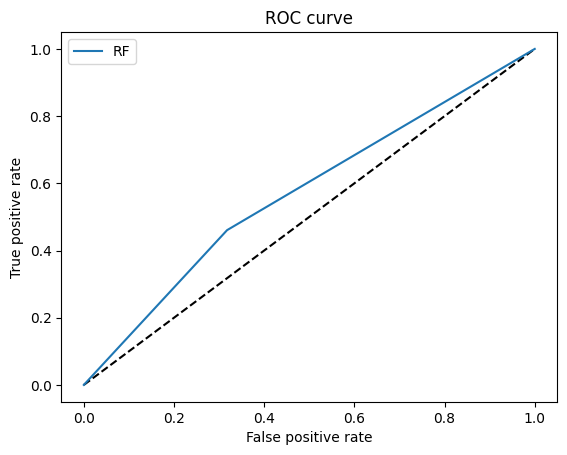

In [32]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
predictions

,ticker,date,y_true,y_pred,proba
0,EURUSD,2024-01-04 04:00:00,1.0000,1.0000,0.6420
1,EURUSD,2024-01-05 03:00:00,0.0000,0.0000,0.5039
2,EURUSD,2024-01-05 19:00:00,0.0000,0.0000,0.5477
3,EURUSD,2024-01-09 06:00:00,1.0000,1.0000,0.6113
4,EURUSD,2024-01-10 08:00:00,1.0000,1.0000,0.5296
5,EURUSD,2024-01-11 15:00:00,0.0000,0.0000,0.6562
6,EURUSD,2024-01-12 03:00:00,0.0000,1.0000,0.5064
7,EURUSD,2024-01-12 07:00:00,1.0000,1.0000,0.5099
8,EURUSD,2024-01-17 17:00:00,1.0000,1.0000,0.6162
9,EURUSD,2024-01-18 13:00:00,1.0000,1.0000,0.5018


In [34]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,ticker,date,y_true,y_pred,proba,binary_pred
0,EURUSD,2024-01-04 04:00:00,1.0000,1.0000,0.6420,0.6420
1,EURUSD,2024-01-05 03:00:00,0.0000,0.0000,0.5039,0.4961
2,EURUSD,2024-01-05 19:00:00,0.0000,0.0000,0.5477,0.4523
3,EURUSD,2024-01-09 06:00:00,1.0000,1.0000,0.6113,0.6113
4,EURUSD,2024-01-10 08:00:00,1.0000,1.0000,0.5296,0.5296
5,EURUSD,2024-01-11 15:00:00,0.0000,0.0000,0.6562,0.3438
6,EURUSD,2024-01-12 03:00:00,0.0000,1.0000,0.5064,0.5064
7,EURUSD,2024-01-12 07:00:00,1.0000,1.0000,0.5099,0.5099
8,EURUSD,2024-01-17 17:00:00,1.0000,1.0000,0.6162,0.6162
9,EURUSD,2024-01-18 13:00:00,1.0000,1.0000,0.5018,0.5018


<Axes: >

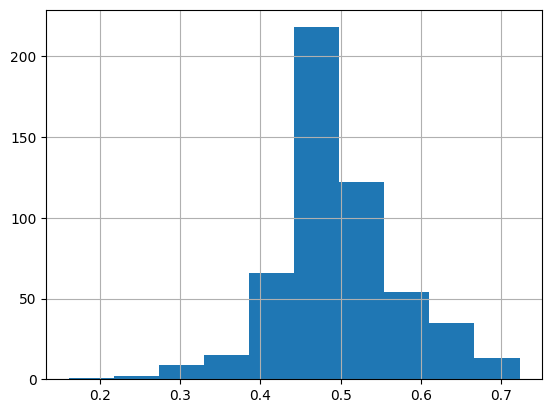

In [52]:
predictions.binary_pred.hist()

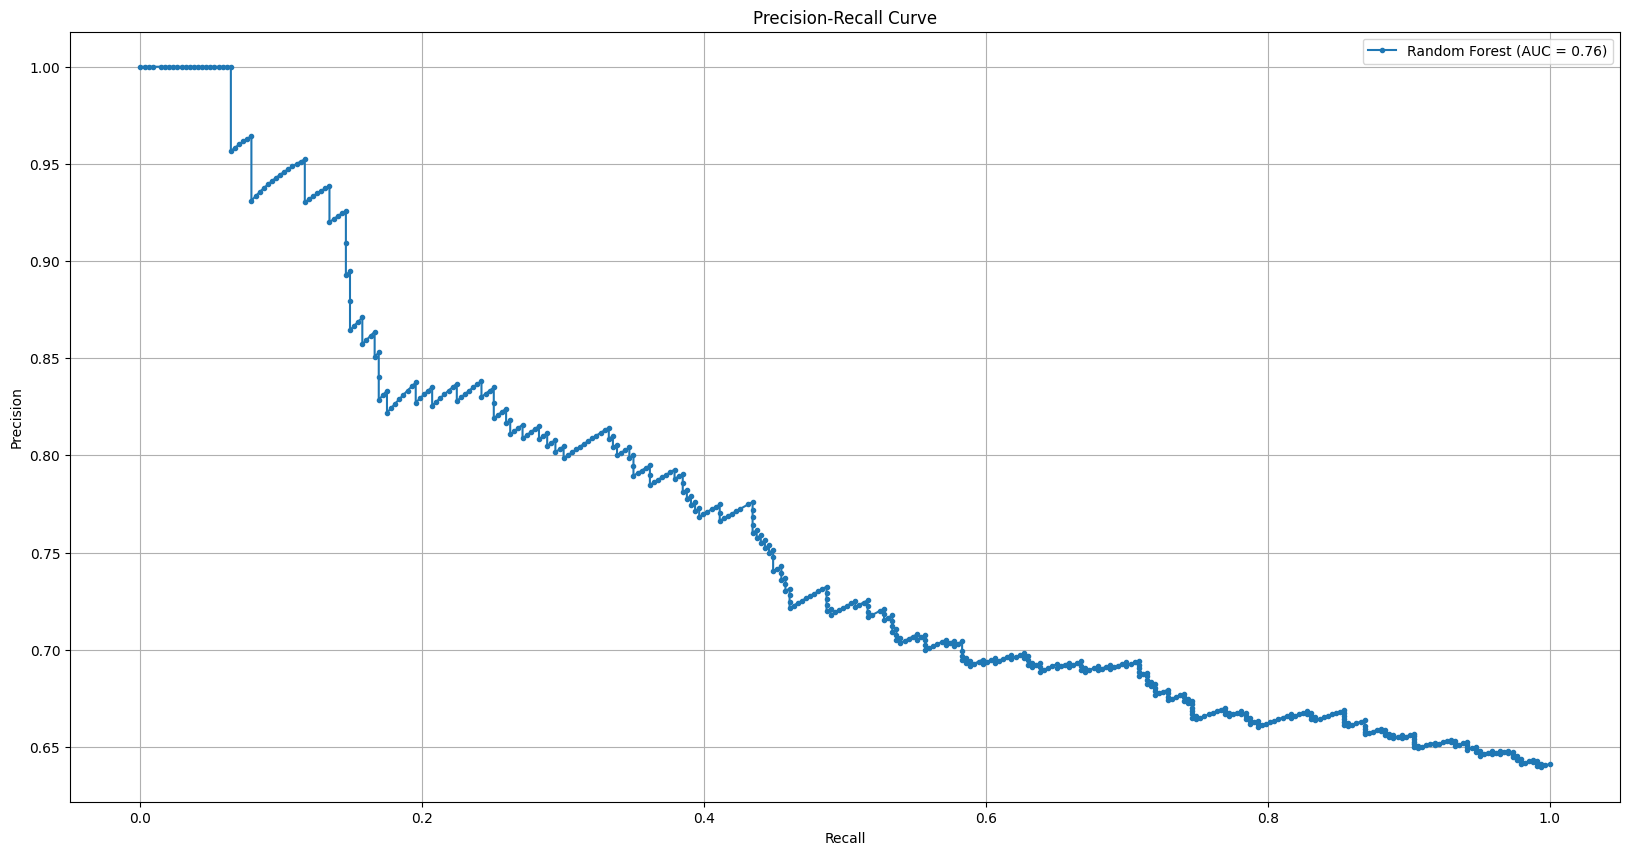

In [35]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [36]:
threshold = 0.499291802702681
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

              precision    recall  f1-score   support

         0.0       0.42      0.68      0.52       192
         1.0       0.73      0.47      0.57       343

    accuracy                           0.55       535
   macro avg       0.57      0.58      0.54       535
weighted avg       0.62      0.55      0.55       535



In [48]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [51]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.2)

(0.5326005999348711,
 0.8142857142857143,
 0.3323615160349854,
 0.7712724434035909)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [56]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [57]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

features = get_xgboost_feature_importance_from_stacking(pipeline)
features_df = pd.DataFrame({'feature':features.keys(), 'importance':features.values()})
features_df.sort_values(by='importance', ascending=False)

,feature,importance
40,side,0.1328
4,ema_200,0.0787
10,lower_bband,0.0734
15,macd,0.0684
13,mfi,0.0565
17,macdhist,0.0494
8,upper_bband,0.0490
6,rsi,0.0475
25,change_percent_3_day,0.0420
26,change_percent_h,0.0398


In [45]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

KeyError: 'fecha'

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()